# Extended Data Figure 8

## Extended Data Figure 8a

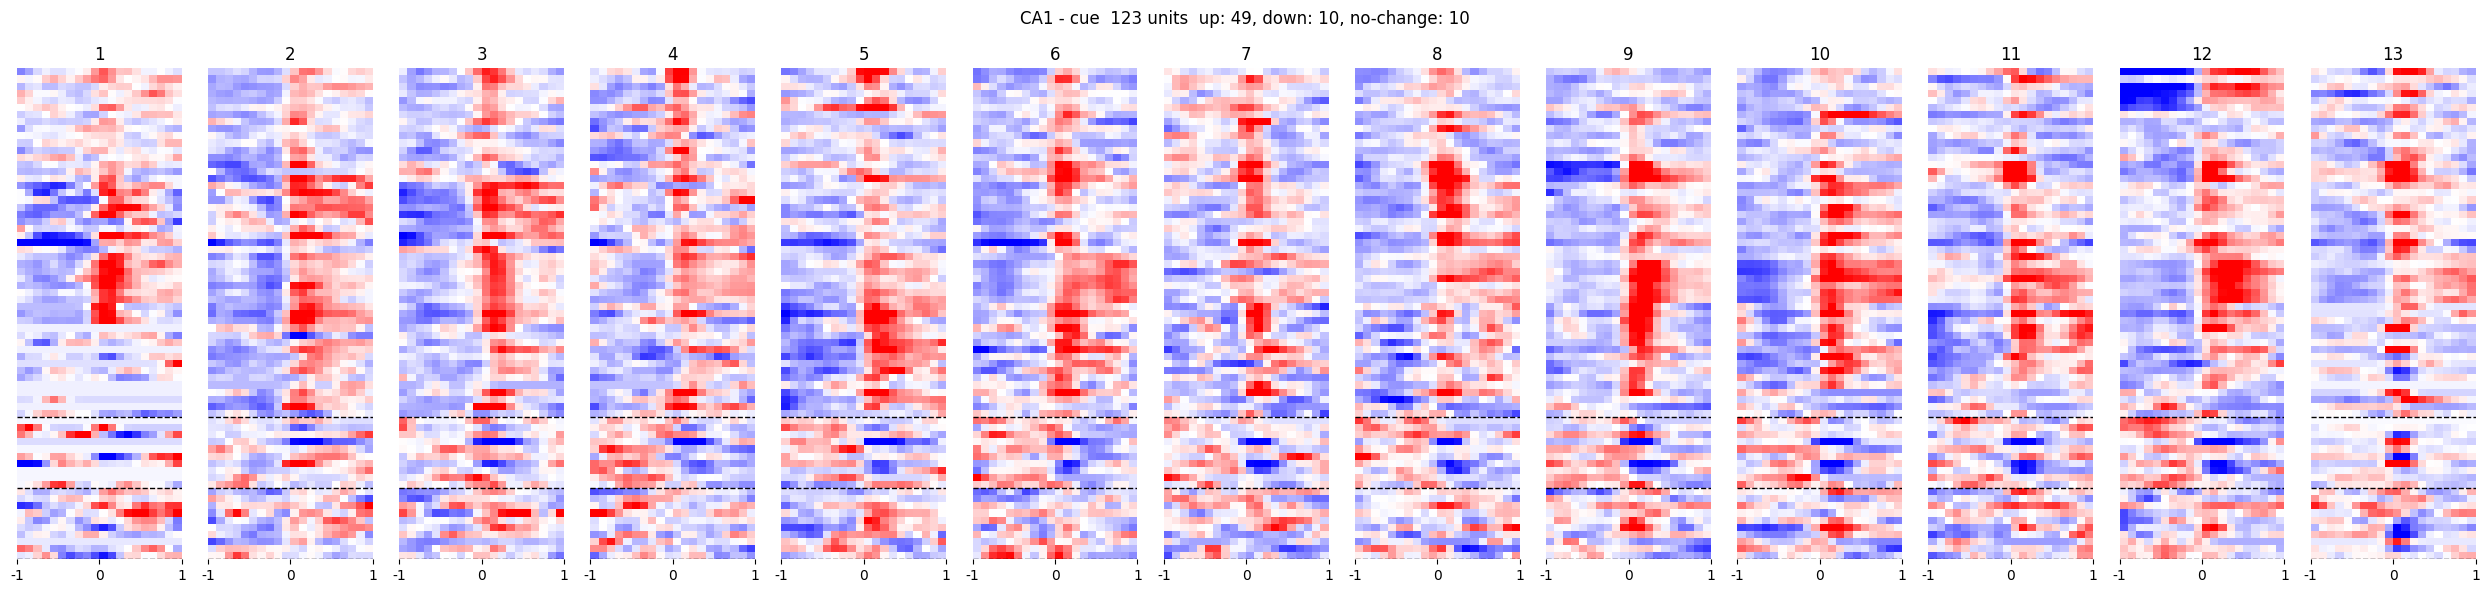

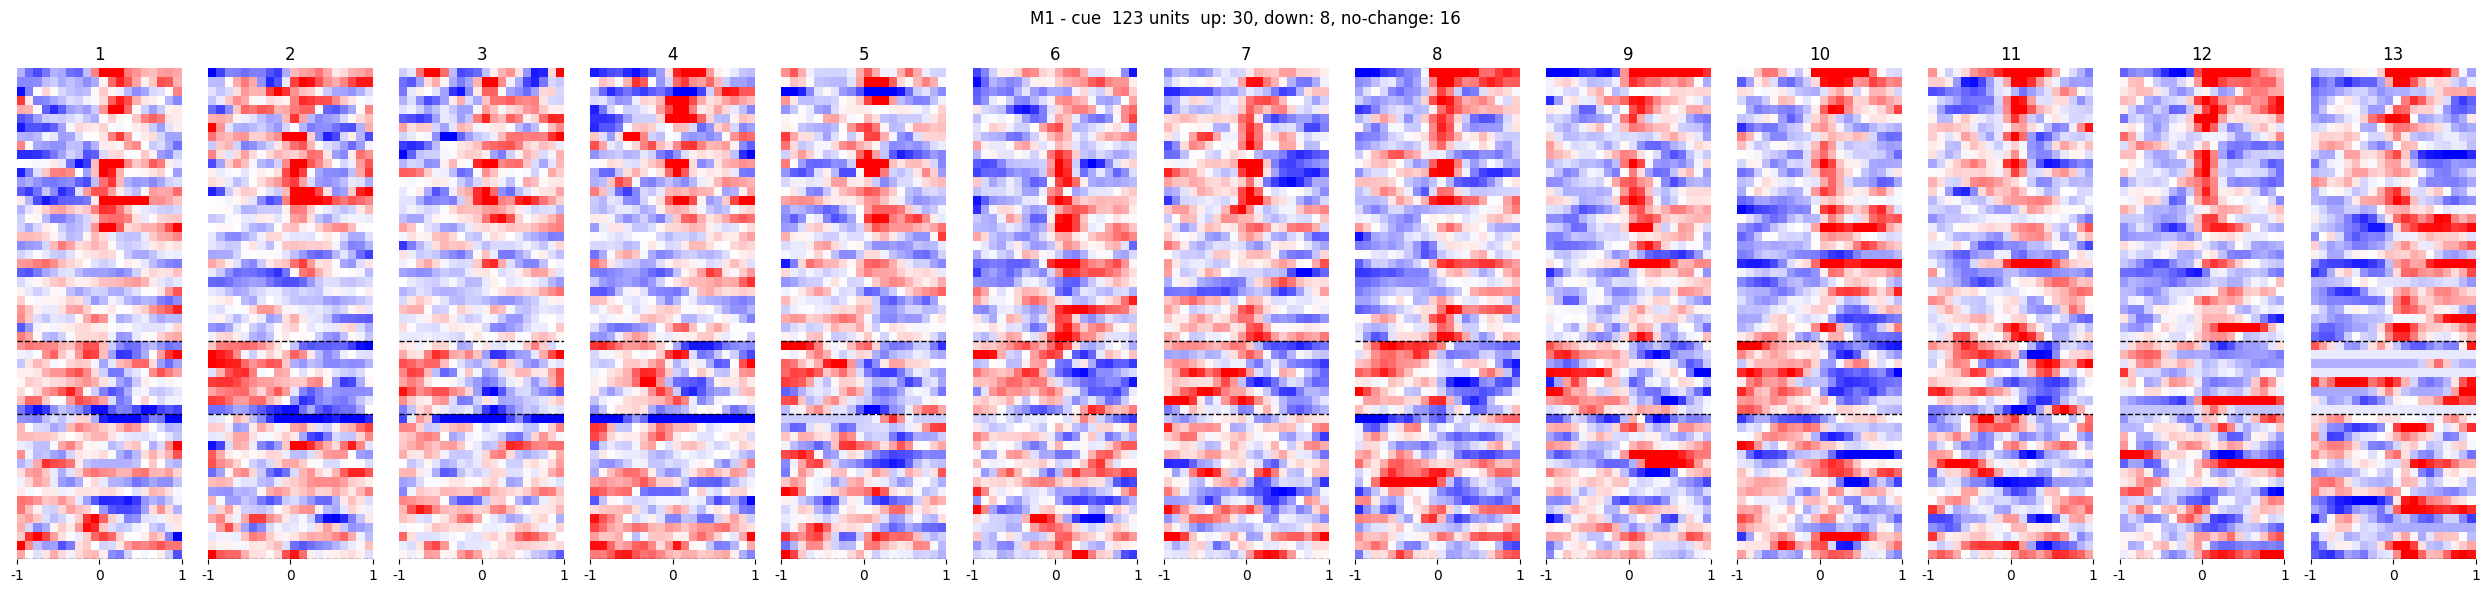

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

from scipy.ndimage import gaussian_filter1d

react_units = {
    'cue':{
        'CA1': {
            'up': {
                'M15_2': [1, 10, 11, 13, 15, 24, 29, 44, 45, 48, 6, 7, 9],
                'M15_3': [25, 29, 34],
                'M15_5': [11, 12, 15, 21, 4, 5, 62, 66, 7, 9],
                'M15_7': [11, 12, 13, 14, 19, 20, 7],
                'M16_1': [1, 10, 11, 13, 14, 2, 3, 36, 5, 57, 59, 6, 60, 7, 8, 9],
            },
            'down': {
                'M15_2': [],
                'M15_3': [],
                'M15_5': [],
                'M15_7': [],
                'M16_1': [25, 26, 32, 33, 37, 38, 54, 58, 61, 62],
            },
        },
        'M1': {
            'up': {
                'M15_2': [],
                'M15_3': [23],
                'M15_5': [28, 29, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
                'M15_7': [10, 17, 18, 19, 21, 30, 37, 4, 41, 46, 48, 51, 53, 57, 6],
                'M16_1': [],
            },
            'down': {
                'M15_2': [],
                'M15_3': [],
                'M15_5': [],
                'M15_7': [42, 44, 45, 52, 55, 56, 58, 59],
                'M16_1': [],
            },
        },
    },
    'reward': {
        'CA1': {
            'up': {
                'M15_2': [],
                'M15_3': [],
                'M15_5': [],
                'M15_7': [],
                'M16_1': [33, 5, 58],
            },
            'down': {
                'M15_2': [1, 13, 15, 24, 48, 6, 7, 8, 9],
                'M15_3': [25, 29, 34],
                'M15_5': [11, 15, 21, 4, 5, 62, 66, 8, 9],
                'M15_7': [11, 12, 13, 14, 19, 20, 7],
                'M16_1': [1, 10, 2, 3, 36, 8],
            },
        },
        'M1': {
            'up': {
                'M15_2': [],
                'M15_3': [],
                'M15_5': [38], 
                'M15_7': [14, 15, 24, 30, 36, 42, 44, 51, 52, 56, 57, 58],
                'M16_1': [],
            },
            'down': {
                'M15_2': [],
                'M15_3': [23],
                'M15_5': [28, 29, 31, 33, 34, 40, 44],
                'M15_7': [10, 19, 21, 22, 29, 32, 37, 4, 41, 53, 6],
                'M16_1': [],
            },
        },
    },
}


# Open the file in read mode
with open(f'../Source data/Extended Data Figure 8/densities.pickle', 'rb') as file:
    # Deserialize and load the object from the file
    loaded_densities = pickle.load(file)

n_segment = 13

# Define color scale limits for different brain regions
vlims = {
    'CA1': 1.8,
    'M1': 1.5,
}

# Define conditions for analysis
conditions = ['cue']

for plot_region in ['CA1', 'M1']:
    for condition in conditions:    
        # Categorize units based on response type
        typed_bins = {
            'up': [],
            'down': [],
            'no-change': [],
        }
        
        # Sort units into up, down, or no-change groups
        for (subject, region, unit_id), bins in loaded_densities.items():
            if region != plot_region: 
                continue
            if unit_id in react_units[condition][region]['up'][subject]:
                label = 'up'
            elif unit_id in react_units[condition][region]['down'][subject]:
                label = 'down'
            else:
                label = 'no-change'
            typed_bins[label].append(bins[condition]) 

        # Count the number of units in each category
        unit_counts = [0]
        for label, label_bins in typed_bins.items():
            unit_counts.append(unit_counts[-1] + len(label_bins))
        unit_counts = unit_counts[1:]

        # Create a figure for visualization
        fig = plt.figure(figsize=(25, 6))
        fig.suptitle(f'{plot_region} - {condition}  {len(loaded_densities)} units  ' + 
                     ', '.join([f'{label}: {len(label_bins)}' for label, label_bins in typed_bins.items()]))

        for segment_index in range(n_segment):
            ax = plt.subplot(1, n_segment, segment_index + 1)  
            segment_bins = []

            for label, label_bins in typed_bins.items():
                # Extract data for the current segment
                segment_data = np.array(label_bins)[:, segment_index]
                
                # Normalize the segment_bins
                segment_data = (segment_data - segment_data.mean()) / (segment_data.std() + 1e-6)
                
                segment_bins.append(segment_data)
            
            # Stack unit responses from different categories
            segment_bins = np.vstack(segment_bins)

            # Apply Gaussian smoothing
            segment_bins = gaussian_filter1d(segment_bins, 1)

            # Plot heatmap
            sns.heatmap(segment_bins, cmap=plt.cm.bwr, ax=ax, 
                        vmin=-vlims[plot_region], vmax=vlims[plot_region], cbar=False)
            ax.set_yticks([])

            # Add horizontal lines to separate unit categories
            for type_index, y in enumerate(unit_counts):
                ax.axhline(y=y, color='black', linestyle='--', alpha=1, linewidth=1)

            ax.set_title(f'{segment_index+1}')
            ax.set_xticks([0, 10, 20], [-1, 0, 1] if condition == 'cue' else [0, 1, 2])

        plt.tight_layout()

        # Create directory if it does not exist
        # os.makedirs(figure_folder, exist_ok=True)

        # Save the figure
        # plt.savefig(f'{figure_folder}/{plot_region}-{condition}_heatmap.pdf')
        plt.show() 
        plt.close()

## Extended Data Figure 8 b

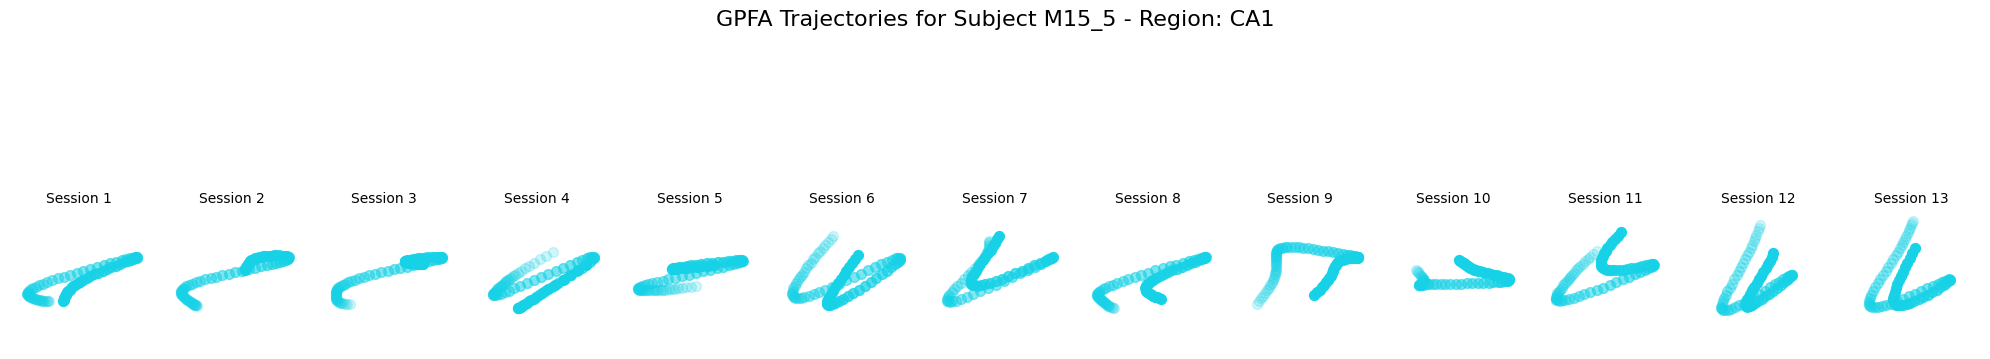

Figure saved to figure/behavior-v2/M15_5_CA1_GPFA_Trajectories.pdf


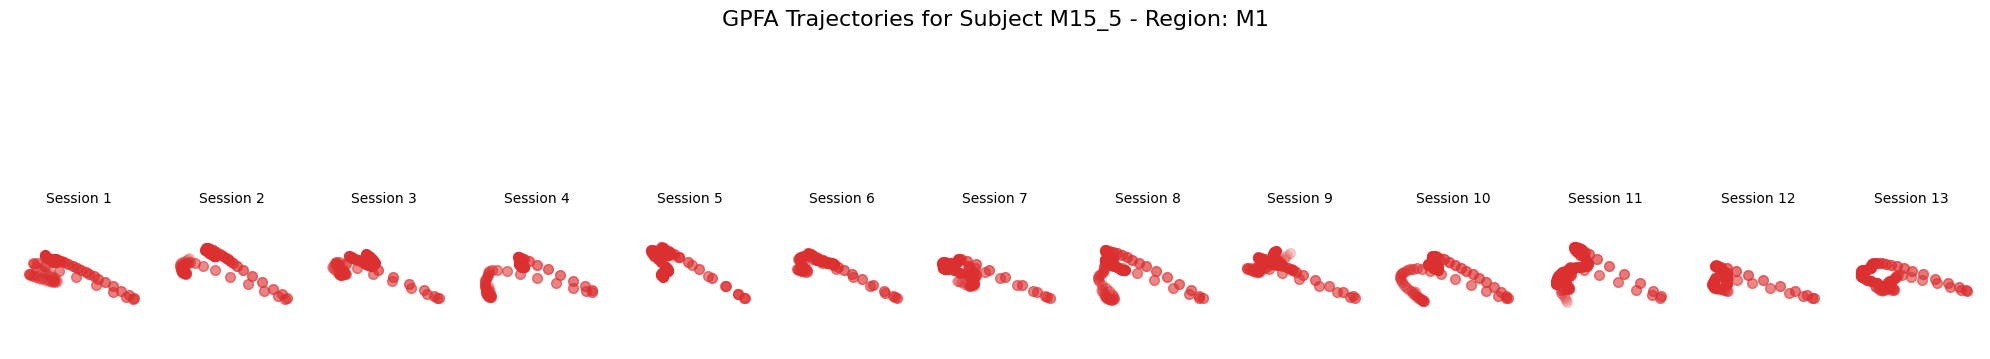

Figure saved to figure/behavior-v2/M15_5_M1_GPFA_Trajectories.pdf


In [ ]:
# 3D version
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import quantities as pq

def normalize_and_center_trajectories(region_trajectories, n_segment, n_total_trial):
    """
    Normalize and center trajectories to a global coordinate system.
    Ensures consistent x, y, z axis ranges and sets the origin as the start point.

    :param region_trajectories: The trajectories for the region.
    :param n_segment: Total number of segments/sessions.
    :param n_total_trial: Number of trials per session.
    :return: Normalized and centered trajectories.
    """
    # Initialize lists to store all trajectories
    all_dim1 = []
    all_dim2 = []
    all_dim3 = []

    # Collect all data points to determine global min and max for x, y, z
    for segment_index in range(n_segment):
        start_idx = segment_index * n_total_trial
        end_idx = (segment_index + 1) * n_total_trial
        segment_trajectories = region_trajectories[start_idx:end_idx]
        mean_segment_trajectory = np.mean(segment_trajectories, axis=0)

        all_dim1.extend(mean_segment_trajectory[0])
        all_dim2.extend(mean_segment_trajectory[1])
        all_dim3.extend(mean_segment_trajectory[2])

    # Determine global min and max for each axis
    global_min_x, global_max_x = min(all_dim1), max(all_dim1)
    global_min_y, global_max_y = min(all_dim2), max(all_dim2)
    global_min_z, global_max_z = min(all_dim3), max(all_dim3)

    # Normalize each segment to the global coordinate system
    normalized_trajectories = []
    for segment_index in range(n_segment):
        start_idx = segment_index * n_total_trial
        end_idx = (segment_index + 1) * n_total_trial
        segment_trajectories = region_trajectories[start_idx:end_idx]
        mean_segment_trajectory = np.mean(segment_trajectories, axis=0)

        # Center at the origin and normalize
        dim1 = (mean_segment_trajectory[0] - global_min_x) / (global_max_x - global_min_x)
        dim2 = (mean_segment_trajectory[1] - global_min_y) / (global_max_y - global_min_y)
        dim3 = (mean_segment_trajectory[2] - global_min_z) / (global_max_z - global_min_z)

        normalized_trajectories.append((dim1, dim2, dim3))

    return normalized_trajectories


def plot_all_sessions_in_one(region_trajectories, region, n_segment, n_total_trial, view_angles=(30, 30), output_folder="figure/behavior-v2"):
    """
    Plot all sessions' GPFA trajectories in a single horizontal figure for a specific region with its own view angle.
    Export the resulting figure as a PDF.
    """
    # Normalize and center trajectories
    normalized_trajectories = normalize_and_center_trajectories(region_trajectories, n_segment, n_total_trial)

    # Create a large horizontal figure
    fig, axes = plt.subplots(1, n_segment, subplot_kw={'projection': '3d'}, figsize=(20, 5))
    if n_segment == 1:  # Handle single session case
        axes = [axes]
    fig.suptitle(f"GPFA Trajectories for Subject M15_5 - Region: {region}", fontsize=16)

    for segment_index in range(n_segment):
        dim1, dim2, dim3 = normalized_trajectories[segment_index]

        ax = axes[segment_index]
        point_color = '#17d2e6' if region == "CA1" else '#db2f30'

        # Plot points with transparency
        for i in range(len(dim1)):
            alpha_value = 0.2 + (1 - 0.2) * (i / len(dim1))
            ax.scatter(dim1[i], dim2[i], dim3[i], c=point_color, s=50, alpha=alpha_value)

        ax.set_title(f"Session {segment_index + 1}", fontsize=10)
        ax.set_xlabel('Dim 1')
        ax.set_ylabel('Dim 2')
        ax.set_zlabel('Dim 3')
        ax.view_init(*view_angles)
        ax.set_axis_off()

    plt.tight_layout(rect=[0, 0, 1, 0.95])

    os.makedirs(output_folder, exist_ok=True)
    output_file = os.path.join(output_folder, f"M15_5_{region}_GPFA_Trajectories.pdf")
    # plt.savefig(output_file, format="pdf", bbox_inches="tight", transparent=True)
    plt.show()
    print(f"Figure saved to {output_file}")


# Configuration
bin_size_ms = 25
bin_size = bin_size_ms * pq.ms

trajectories_3d_file = f'../Source data/Extended Data Figure 8/M15_5_trajectories_3d_bin{bin_size_ms}.pickle'
all_trajectories_3d = pickle.load(open(trajectories_3d_file, 'rb'))

view_angles_CA1 = (45, 45)  # CA1 view angle
view_angles_M1 = (45, 45)   # M1 view angle

n_segment = 13
n_total_trial = 100

for region, region_trajectories in all_trajectories_3d.items():
    if region == "CA1":
        plot_all_sessions_in_one(region_trajectories, region, n_segment, n_total_trial, view_angles=view_angles_CA1)
    elif region == "M1":
        plot_all_sessions_in_one(region_trajectories, region, n_segment, n_total_trial, view_angles=view_angles_M1)

## Extended Data Figure 8c and d

Region: CA1
Mean correlation for CA1 (Dimension 1): 0.7773
Mean correlation for CA1 (Dimension 2): 0.9182
Figure saved as PDF: figure/behavior-v2/M15_5_CA1_trajectories.pdf


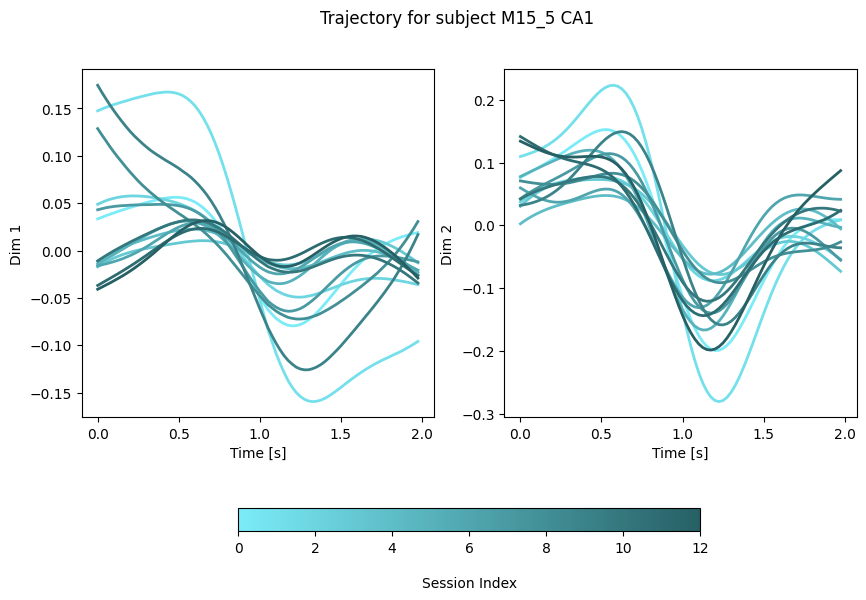

Region: M1
Mean correlation for M1 (Dimension 1): 0.7862
Mean correlation for M1 (Dimension 2): 0.8584
Figure saved as PDF: figure/behavior-v2/M15_5_M1_trajectories.pdf


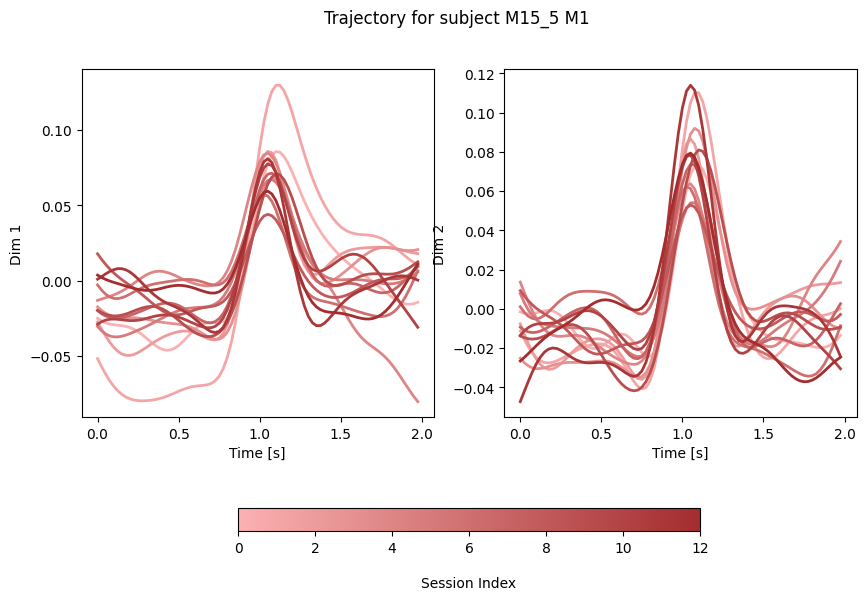

In [17]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
import os
import matplotlib.pyplot as plt
import quantities as pq
import pickle
from scipy.stats import pearsonr


def create_gradient_colormap(color1, color2, name):
    return LinearSegmentedColormap.from_list(name, [color1, color2])


def compute_adjacent_segment_correlations(region_trajectories, n_segment, n_total_trial, dimension=0):
    adjacent_correlations = []
    dim_segments = []
    for segment_index in range(n_segment):
        segment_trajectories = region_trajectories[segment_index * n_total_trial:(segment_index + 1) * n_total_trial]
        mean_segment_trajectory = np.mean(segment_trajectories, axis=0)
        dim_segments.append(mean_segment_trajectory[dimension])

    for i in range(n_segment - 1):
        corr, _ = pearsonr(dim_segments[i], dim_segments[i + 1])
        adjacent_correlations.append((i + 1, i + 2, corr))
    return adjacent_correlations


def print_mean_correlations_by_dimension(region_trajectories, region, n_segment, n_total_trial):
    for dim in [0, 1]:
        correlations = compute_adjacent_segment_correlations(region_trajectories, n_segment, n_total_trial, dimension=dim)
        mean_corr = np.mean([corr for _, _, corr in correlations])
        print(f"Mean correlation for {region} (Dimension {dim + 1}): {mean_corr:.4f}")


def plot_trajectories(region_trajectories, subject, region, output_folder='figure/behavior-v2'):
    os.makedirs(output_folder, exist_ok=True)
    f = plt.figure(figsize=(10, 6))
    f.suptitle(f'Trajectory for subject {subject} {region}')
    
    ax2 = plt.subplot(1, 2, 1)  # Dim 1 vs Time
    ax3 = plt.subplot(1, 2, 2)  # Dim 2 vs Time

    linewidth_single_trial = 2
    alpha_single_trial = 1

    cmap = create_gradient_colormap("#7aecf8", "#266065", "ca1_gradient") if region == "CA1" else create_gradient_colormap("#fbb1b2", "#a42d2e", "m1_gradient")
    norm = Normalize(0, n_segment - 1)

    times_trajectory = np.arange(len(region_trajectories[0][0])) * bin_size.rescale('s')

    # Dim 1 vs Time
    ax2.set_xlabel('Time [s]')
    ax2.set_ylabel('Dim 1')
    for segment_index in range(n_segment):
        segment_trajectories = region_trajectories[segment_index * n_trial_per_segment:(segment_index + 1) * n_trial_per_segment]
        mean_segment_trajectory = np.mean(segment_trajectories, axis=0)
        mean_segment_trajectory[0] -= mean_segment_trajectory[0].mean()
        color = cmap(norm(segment_index))
        ax2.plot(times_trajectory, mean_segment_trajectory[0], lw=linewidth_single_trial, c=color, alpha=alpha_single_trial)

    # Dim 2 vs Time
    ax3.set_xlabel('Time [s]')
    ax3.set_ylabel('Dim 2')
    for segment_index in range(n_segment):
        segment_trajectories = region_trajectories[segment_index * n_trial_per_segment:(segment_index + 1) * n_trial_per_segment]
        mean_segment_trajectory = np.mean(segment_trajectories, axis=0)
        mean_segment_trajectory[1] -= mean_segment_trajectory[1].mean()
        color = cmap(norm(segment_index))
        ax3.plot(times_trajectory, mean_segment_trajectory[1], lw=linewidth_single_trial, c=color, alpha=alpha_single_trial)

    # Colorbar below both plots
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = f.colorbar(sm, ax=[ax2, ax3], orientation='horizontal', fraction=0.05, pad=0.25)
    cbar.set_label('Session Index', rotation=0, labelpad=15)

    # Adjust layout manually to make space for colorbar
    plt.subplots_adjust(bottom=0.3)

    # Save figure
    pdf_filename = os.path.join(output_folder, f'{subject}_{region}_trajectories.pdf')
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
    print(f"Figure saved as PDF: {pdf_filename}")
    plt.show()


# === Configuration ===
bin_size_ms = 25
bin_size = bin_size_ms * pq.ms
n_trial_per_segment = 100
n_segment = 13
output_folder = 'figure/behavior-v2'

# === Load and process data ===
subject = "M15_5"
trajectories_2d_file = f'../Source data/Extended Data Figure 8/{subject}_trajectories_2d_bin{bin_size_ms}.pickle'
subject_trajectories_2d = pickle.load(open(trajectories_2d_file, 'rb'))

# === Run analysis and plot ===
for region, trajectories in subject_trajectories_2d.items():
    print(f"Region: {region}")
    print_mean_correlations_by_dimension(trajectories, region, n_segment, n_trial_per_segment)
    plot_trajectories(trajectories, subject, region, output_folder=output_folder)